In [2]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans,kmeans_plusplus
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.path as mpath

In [5]:
def caldistance(x, y):
    dist = np.sqrt(np.sum(np.square(x-y)))  # Calculate Euclidean distance
    return dist

def Mean(x):
    mean_value = sum(x)/len(x)
    return mean_value

In [ ]:
input_path = '/Users/liangxintai/Desktop/CSI_authentication/data_sample/final_User_profile_amplitude/' 
files = os.listdir(input_path)
files.sort()

In [ ]:
for m in range(len(files)):
    df = pd.read_csv(input_path + files[m], index_col=0, header=None)
    # df = pd.concat(dfs)  
    df.reset_index(inplace=True)
    # df = df.reindex(np.random.permutation(df.index))

    y = df.iloc[:,0]
    x = df.iloc[:,1:]
    cluster = KMeans(n_clusters=2,init="k-means++",random_state=10).fit(np.array(x))
    label = cluster.labels_
    centers = cluster.cluster_centers_

    center1 = centers[0]
    center2 = centers[1]

    dis = caldistance(center1,center2)
    print('Calculation result:',dis)

    threshold = 1.5

    if dis > threshold:
        print('--User',m,':!!!!!!Suspicious spoofer attacker!!!!!!\n')
    else:
        # df.to_csv('/Users/liangxintai/Desktop/CSI_authentication/data_sample/final_User_profile/User%s.csv' % m, index=False, header=False)
        print('--User',m,':Profile built!\n')

In [26]:
# Amplitude or Phase
auth_basis = 'amplitude'
# auth_basis = 'phase'

['User0.csv', 'User1.csv', 'User2.csv']


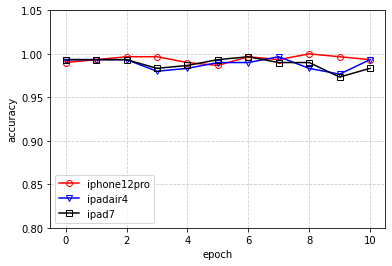

Average authentication accuracy (iphone12pro): 0.993939393939394
Average authentication accuracy (ipadair4): 0.9884848484848486
Average authentication accuracy (ipad7): 0.9887878787878787


In [27]:
# User authentication accuracy

# Label for User m is m, label for unknown user and spoofer is 404
# User0 -- iphone12pro
# User1 -- ipadair4
# User2 -- ipad7
# spoofer -- sumsung s20

accuracy = []

if auth_basis == 'amplitude':
    # input_path = '/Users/liangxintai/Desktop/CSI_authentication/data_sample/final_User_profile_amplitude/' # Data used to train
    input_path = '/Users/liangxintai/Desktop/CSI_authentication/lab_s1/data_sample/final_User_profile_amplitude/'
elif auth_basis == 'phase':
    # input_path = '/Users/liangxintai/Desktop/CSI_authentication/data_sample/final_User_profile_phase/'
    input_path = '/Users/liangxintai/Desktop/CSI_authentication/lab_s1/data_sample/final_User_profile_phase/'

files = os.listdir(input_path)
files.sort()
print(files)
# files = [k for k in files if train_file_name in k]
# files = [k for k in files]

for file_name in files:
    
    accuracy = []

    for i in range(11):
    
        # data_tested = 'User' # spoofer or User
        train_file_name = file_name # User profile name
        # test_file_name = file_name # spoofer(spoofer); User(User0, User1, User2)

        df = pd.read_csv(input_path + file_name, index_col=0, header=None)
        df.reset_index(inplace=True)
        df = df.reindex(np.random.permutation(df.index))

        # files_test = os.listdir(input_path_test)
        # files_test = [k for k in files_test if test_file_name in k]

        # print(files_test)

        # df_test = pd.read_csv(input_path_test + files_test[0], index_col=0, header=None)
        # df_test.reset_index(inplace=True)
        # df_test = df_test.reindex(np.random.permutation(df_test.index))

        x = df.iloc[:,1:]

        train_size = int(len(x)*0.8)
        # test_size = int(len(x)*0.3)

        x_train = df.iloc[:train_size,1:]
        y_test_1 = df.iloc[train_size:,0]
        # y_test_1 = df.iloc[:test_size,0]
        x_test_1 = df.iloc[train_size:,1:]
        # x_test_1 = df.iloc[:test_size,1:]

        label_1 = y_test_1.to_numpy()[0]

        # y_test_2 = df_test.iloc[train_size:,0]
        # x_test_2 = df_test.iloc[train_size:,1:]

        # label_2 = y_test_2.to_numpy()[0]

        x_test = [x_test_1]
        x_test = pd.concat(x_test)

        y_test = [y_test_1]
        y_test = pd.concat(y_test)

        ocsvm = OneClassSVM(kernel='rbf',gamma='scale', nu=0.01)
        ocsvm.fit(x_train)

        out_test = ocsvm.predict(x_test)

        label_2 = 404

        out_test[out_test == 1] = label_1
        out_test[out_test == -1] = label_2
        test_accuracy = accuracy_score(out_test,y_test)
        accuracy.append(test_accuracy)

    if train_file_name == 'User0.csv':
        accuracy0 = accuracy
    elif train_file_name == 'User1.csv':
        accuracy1 = accuracy
    elif train_file_name == 'User2.csv':
        accuracy2 = accuracy

    # print(test_accuracy)

x = [0,1,2,3,4,5,6,7,8,9,10]
# plt.title('User authentication accuracy')
plt.plot(x,accuracy0,'r', marker='o', linewidth=1.5, label='iphone12pro', fillstyle='none')
plt.plot(x,accuracy1,'b', marker='v', linewidth=1.5, label='ipadair4', fillstyle='none')
plt.plot(x,accuracy2,'k', marker='s', linewidth=1.5, label='ipad7', fillstyle='none')
plt.ylim((0.8,1.05))
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.xlim(0,11)
plt.grid(axis='both', color = '0.8', linestyle = '--')
plt.legend()
plt.savefig('auth_acc_ph.pdf', dpi=500)
plt.show()


print('Average authentication accuracy (iphone12pro):',Mean(accuracy0))
print('Average authentication accuracy (ipadair4):',Mean(accuracy1))
print('Average authentication accuracy (ipad7):',Mean(accuracy2))

# print(out_test)


In [11]:
# Amplitude or Phase
# auth_basis = 'amplitude'
auth_basis = 'phase'

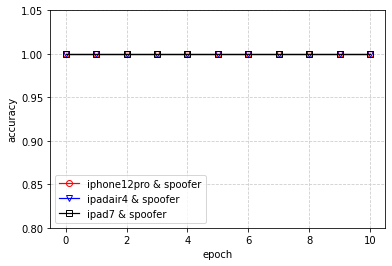

Spoofer detection accuracy (iphone12pro): 1.0
Spoofer detection accuracy (ipadair4): 1.0
Spoofer detection accuracy (ipad7): 1.0


In [12]:
# Spoofer detection accuracy

# Label for User m is m, label for unknown user and spoofer is 404
# User0 -- iphone12pro
# User1 -- ipadair4
# User2 -- ipad7
# spoofer -- sumsung s20

if auth_basis == 'amplitude':
    # input_path = '/Users/liangxintai/Desktop/CSI_authentication/data_sample/final_User_profile_amplitude/' # Data used to train
    input_path = '/Users/liangxintai/Desktop/CSI_authentication/lab_s1/data_sample/final_User_profile_amplitude/'
else:
    # input_path = '/Users/liangxintai/Desktop/CSI_authentication/data_sample/final_User_profile_phase/'
    input_path = '/Users/liangxintai/Desktop/CSI_authentication/lab_s1/data_sample/final_User_profile_phase/'
    

files = os.listdir(input_path)
files.sort()

for file_name in files:
    accuracy_detection = []

    for i in range(11):

        data_tested = 'spoofer' # spoofer or User
        train_file_name = file_name # User profile name
        test_file_name = 'spoofer' # spoofer(spoofer); User(User0, User1, User2)

        # print(files)

        df = pd.read_csv(input_path + train_file_name, index_col=0, header=None)
        df.reset_index(inplace=True)
        df = df.reindex(np.random.permutation(df.index))

        if auth_basis == 'amplitude':
            # input_path_test = '/Users/liangxintai/Desktop/CSI_authentication/data_sample/final_Spoofer_profile_amplitude/'
            input_path_test = '/Users/liangxintai/Desktop/CSI_authentication/home_s2/data_sample/final_Spoofer_profile_amplitude/'
            # input_path_test = '/Users/liangxintai/Desktop/CSI_authentication/multi_spoofer/amplitude/'
        else:
            # input_path_test = '/Users/liangxintai/Desktop/CSI_authentication/data_sample/final_Spoofer_profile_phase/'
            input_path_test = '/Users/liangxintai/Desktop/CSI_authentication/home_s2/data_sample/final_Spoofer_profile_phase/'
            # input_path_test = '/Users/liangxintai/Desktop/CSI_authentication/multi_spoofer/phase/'
        

        files_test = os.listdir(input_path_test)
        files_test.sort()
        files_test = [k for k in files_test if test_file_name in k]

        # print(files_test)
        file_test_input = files_test[0]
        # print(file_test_input)

        df_test = pd.read_csv(input_path_test + file_test_input, index_col=0, header=None)
        df_test.reset_index(inplace=True)
        df_test = df_test.reindex(np.random.permutation(df_test.index))

        x = df.iloc[:,1:]

        train_size = int(len(x)*0.9)
        # test_size = int(len(x)*0.3)

        x_train = df.iloc[:train_size,1:]
        y_test_1 = df.iloc[train_size:,0]
        # y_test_1 = df.iloc[:test_size,0]
        x_test_1 = df.iloc[train_size:,1:]
        # x_test_1 = df.iloc[:test_size,1:]

        label_1 = y_test_1.to_numpy()[0]

        y_test_2 = df_test.iloc[train_size:,0]
        x_test_2 = df_test.iloc[train_size:,1:]

        label_2 = y_test_2.to_numpy()[0]

        x_test = [x_test_2]
        x_test = pd.concat(x_test)

        y_test = [y_test_2]
        y_test = pd.concat(y_test)

        ocsvm = OneClassSVM(kernel='rbf',gamma='scale', nu=0.01)
        ocsvm.fit(x_train)

        out_test = ocsvm.predict(x_test)

        if label_1 == label_2:
            label_2 = 404

        out_test[out_test == 1] = label_1
        out_test[out_test == -1] = label_2
        test_accuracy = accuracy_score(out_test,y_test)
        accuracy_detection.append(test_accuracy)

    if train_file_name == 'User0.csv':
        accuracy0 = accuracy_detection
    elif train_file_name == 'User1.csv':
        accuracy1 = accuracy_detection
    elif train_file_name == 'User2.csv':
        accuracy2 = accuracy_detection

    # print(test_accuracy)

# plt.title('Spoofer detection accuracy')
plt.plot(accuracy0, 'r',marker='o', linewidth=1.2, label='iphone12pro & spoofer',fillstyle='none')
plt.plot(accuracy1, 'b',marker='v', linewidth=1.2, label='ipadair4 & spoofer',fillstyle='none')
plt.plot(accuracy2, 'k',marker='s', linewidth=1.2, label='ipad7 & spoofer',fillstyle='none')
plt.ylim((0.8,1.05))
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.xlim(0,21)
plt.grid(axis='both', color = '0.8', linestyle = '--')
plt.legend()
plt.savefig('spoo_detec_ph.png', dpi=500)
plt.show()

print('Spoofer detection accuracy (iphone12pro):',Mean(accuracy0))
print('Spoofer detection accuracy (ipadair4):',Mean(accuracy1))
print('Spoofer detection accuracy (ipad7):',Mean(accuracy2))

In [7]:
# Amplitude or Phase
auth_basis = 'amplitude'
# auth_basis = 'phase'

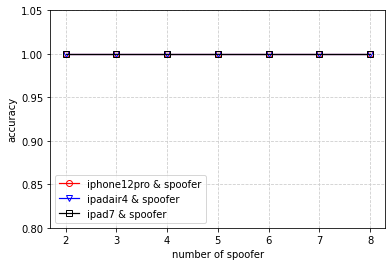

Spoofer detection accuracy (iphone12pro): 1.0
Spoofer detection accuracy (ipadair4): 1.0
Spoofer detection accuracy (ipad7): 1.0


In [10]:
# Spoofer detection accuracy (spoofer number study)

# Label for User m is m, label for unknown user and spoofer is 404
# User0 -- iphone12pro
# User1 -- ipadair4
# User2 -- ipad7
# spoofer -- sumsung s20

if auth_basis == 'amplitude':
    # input_path = '/Users/liangxintai/Desktop/CSI_authentication/data_sample/final_User_profile_amplitude/' # Data used to train
    input_path = '/Users/liangxintai/Desktop/CSI_authentication/lab_s1/data_sample/final_User_profile_amplitude/'
else:
    # input_path = '/Users/liangxintai/Desktop/CSI_authentication/data_sample/final_User_profile_phase/'
    input_path = '/Users/liangxintai/Desktop/CSI_authentication/lab_s1/data_sample/final_User_profile_phase/'
    

files = os.listdir(input_path)
files.sort()

for file_name in files:
    accuracy_detection = []

    # for i in range(11):

    data_tested = 'spoofer' # spoofer or User
    train_file_name = file_name # User profile name
    test_file_name = 'spoofer' # spoofer(spoofer); User(User0, User1, User2)

    # print(files)

    df = pd.read_csv(input_path + train_file_name, index_col=0, header=None)
    df.reset_index(inplace=True)
    df = df.reindex(np.random.permutation(df.index))

    if auth_basis == 'amplitude':
        # input_path_test = '/Users/liangxintai/Desktop/CSI_authentication/data_sample/final_Spoofer_profile_amplitude/'
        # input_path_test = '/Users/liangxintai/Desktop/CSI_authentication/lab_s1/data_sample/final_Spoofer_profile_amplitude/'
        input_path_test = '/Users/liangxintai/Desktop/CSI_authentication/multi_spoofer/amplitude/'
    else:
        # input_path_test = '/Users/liangxintai/Desktop/CSI_authentication/data_sample/final_Spoofer_profile_phase/'
        # input_path_test = '/Users/liangxintai/Desktop/CSI_authentication/home_s1/data_sample/final_Spoofer_profile_phase/'
        input_path_test = '/Users/liangxintai/Desktop/CSI_authentication/multi_spoofer/phase/'
    

    files_test = os.listdir(input_path_test)
    files_test.sort()
    files_test = [k for k in files_test if test_file_name in k]

    # print(files_test)

    for i in range(len(files_test)):
        file_test_input = files_test[i]
        # print(file_test_input)

        df_test = pd.read_csv(input_path_test + file_test_input, index_col=0, header=None)
        df_test.reset_index(inplace=True)
        df_test = df_test.reindex(np.random.permutation(df_test.index))

        x = df.iloc[:,1:]

        train_size = int(len(x)*0.99)
        # test_size = int(len(x)*0.3)

        x_train = df.iloc[:train_size,1:]
        y_test_1 = df.iloc[train_size:,0]
        # y_test_1 = df.iloc[:test_size,0]
        x_test_1 = df.iloc[train_size:,1:]
        # x_test_1 = df.iloc[:test_size,1:]

        label_1 = y_test_1.to_numpy()[0]

        y_test_2 = df_test.iloc[:,0]
        x_test_2 = df_test.iloc[:,1:]

        label_2 = y_test_2.to_numpy()[0]

        x_test = [x_test_2]
        x_test = pd.concat(x_test)

        y_test = [y_test_2]
        y_test = pd.concat(y_test)

        ocsvm = OneClassSVM(kernel='rbf',gamma='scale', nu=0.01)
        ocsvm.fit(x_train)

        out_test = ocsvm.predict(x_test)

        if label_1 == label_2:
            label_2 = 404

        out_test[out_test == 1] = label_1
        out_test[out_test == -1] = label_2
        test_accuracy = accuracy_score(out_test,y_test)
        accuracy_detection.append(test_accuracy)

    if train_file_name == 'User0.csv':
        accuracy0 = accuracy_detection
    elif train_file_name == 'User1.csv':
        accuracy1 = accuracy_detection
    elif train_file_name == 'User2.csv':
        accuracy2 = accuracy_detection

    # print(test_accuracy)

x = [2,3,4,5,6,7,8]
# x = [2,5,6]
# plt.title('Spoofer detection accuracy')
plt.plot(x, accuracy0, 'r',marker='o', linewidth=1.2, label='iphone12pro & spoofer',fillstyle='none')
plt.plot(x, accuracy1, 'b',marker='v', linewidth=1.2, label='ipadair4 & spoofer',fillstyle='none')
plt.plot(x, accuracy2, 'k',marker='s', linewidth=1.2, label='ipad7 & spoofer',fillstyle='none')
plt.ylim((0.8,1.05))
plt.ylabel('accuracy')
# plt.xlim(0,21)
plt.xlabel('number of spoofer')
plt.grid(axis='both', color = '0.8', linestyle = '--')
plt.legend()
plt.savefig('spoofer_num_amp.png',dpi=500)
plt.show()

print('Spoofer detection accuracy (iphone12pro):',Mean(accuracy0))
print('Spoofer detection accuracy (ipadair4):',Mean(accuracy1))
print('Spoofer detection accuracy (ipad7):',Mean(accuracy2))